# Sandbox 2 - City and Ride Data

In [138]:
# import dependencies
import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics as stats
import scipy.stats as sts

%matplotlib inline

## Import Data

In [139]:
# import ride and city data to Pandas dataframe
ride_data_file = "Resources/ride_data.csv"
city_data_file = "Resources/city_data.csv"
ride_df = pd.read_csv(ride_data_file)
city_df = pd.read_csv(city_data_file)
print(ride_df.head())
print(city_df.head())

                 city                 date   fare        ride_id
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344
           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban


## Clean and Examine City Data

In [140]:
# get number of rows for each column
city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [141]:
# examine city data for nan/null values (count and drop)
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [142]:
# make sure driver count is integer type
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [143]:
# count total of each type of city
city_df['type'].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

## Clean and Examine Ride Data

In [144]:
#count rows in ride data
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [145]:
# find nan/null values in ride data
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [146]:
# check data types are correct
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [147]:
#convert date column to datetime
ride_df['date']= pd.to_datetime(ride_df['date'])

# Merge Data

In [148]:
# merge both datframes on city column

merged_df = pd.merge(ride_df, city_df, how='left', on=['city','city'])
merged_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# Create new dataframes for each city type

In [149]:
urban_df = merged_df[merged_df['type']=='Urban']
suburban_df = merged_df[merged_df["type"] == "Suburban"]
rural_df = merged_df[merged_df["type"] == "Rural"]

# example
rural_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [150]:
# get ride counts of each city by type

urban_ride_count = urban_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [151]:
# get average ride fare for each city by type

urban_fare_avg = urban_df.groupby(['city']).mean(numeric_only=True)['fare']
suburban_fare_avg = suburban_df.groupby(['city']).mean(numeric_only=True)['fare']
rural_fare_avg = rural_df.groupby(['city']).mean(numeric_only=True)['fare']
urban_fare_avg.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [152]:
urban_driver_count = urban_df.groupby(['city']).mean(numeric_only=True)['driver_count']
suburban_driver_count = suburban_df.groupby(['city']).mean(numeric_only=True)['driver_count']
rural_driver_count = rural_df.groupby(['city']).mean(numeric_only=True)['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

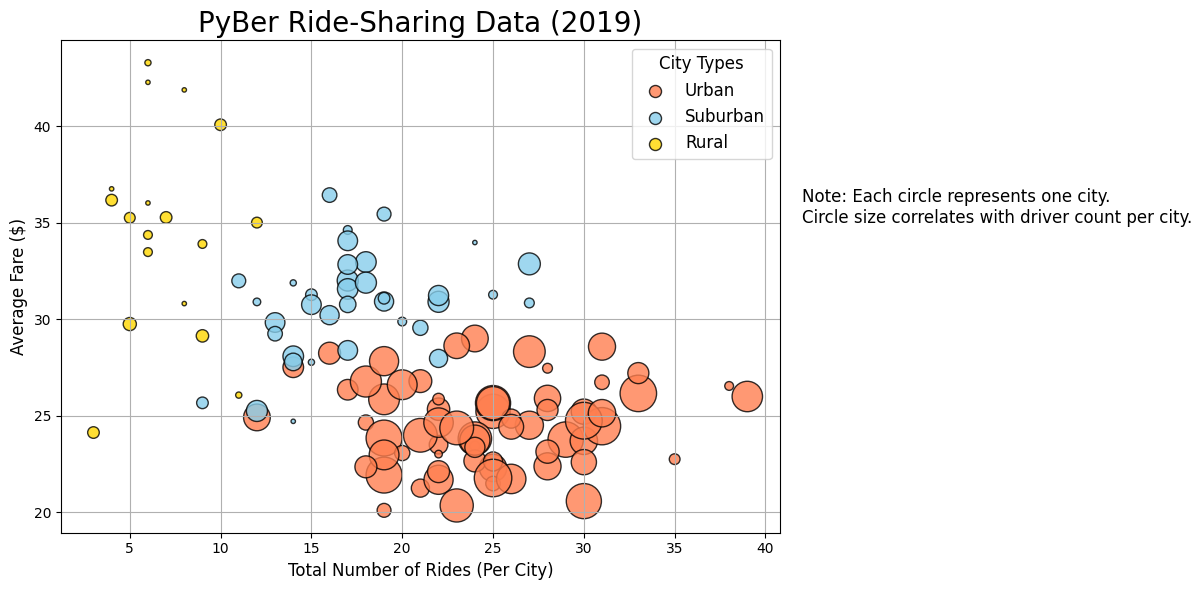

In [153]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(urban_ride_count, 
           urban_fare_avg,
           s=10*urban_driver_count, 
           c="coral",
           edgecolor="black", 
           linewidths=1,
           alpha=0.8, 
           label="Urban")
ax.scatter(suburban_ride_count, 
           suburban_fare_avg,
           s=10*suburban_driver_count, 
           c="skyblue",
           edgecolor="black", 
           linewidths=1,
           alpha=0.8, 
           label="Suburban")
ax.scatter(rural_ride_count, 
           rural_fare_avg,
           s=10*rural_driver_count, 
           c="gold",
           edgecolor="black", 
           linewidths=1,
           alpha=0.8, 
           label="Rural")           
ax.set_title("PyBer Ride-Sharing Data (2019)", fontsize=20)
ax.set_ylabel("Average Fare ($)", fontsize=12)
ax.set_xlabel("Total Number of Rides (Per City)", fontsize=12)
ax.grid(True)
# Add the legend.
lgnd = ax.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
fig.tight_layout()

# Incorporate a text label about circle size.
ax.text(42, 35, "Note: Each circle represents one city.\nCircle size correlates with driver count per city.", fontsize="12")

#save to image file
fig.savefig("analysis/Ride_Share_2019.png")

# Example practice (delete later?)

In [154]:
urban_ride_count.describe()


count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [155]:
suburban_ride_count.mode()

0    17
Name: ride_id, dtype: int64

In [156]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


/var/folders/fg/_95_hyl97vs_68pl3g3nf6mw0000gn/T/ipykernel_22868/1188544488.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_urban_ride_count = sts.mode(urban_ride_count)


In [157]:
# Get the fares for the urban cities.
urban_fares = urban_df["fare"]
suburban_fares = suburban_df['fare']
rural_fares = rural_df['fare']

urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [158]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


/var/folders/fg/_95_hyl97vs_68pl3g3nf6mw0000gn/T/ipykernel_22868/244280386.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_urban_fares = sts.mode(urban_fares)


## Alternative approach for combining and plotting columns from separate dataframes

In [159]:
# Get the driver count data from the urban cities into new dataframe
# drivers_df = pd.DataFrame([urban_df['driver_count'].sum(), suburban_df['driver_count'].sum(), rural_df['driver_count'].sum()], index=['Urban', 'Suburban', 'Rural'])
# drivers_df

# fig, ax = plt.subplots()

# drivers_df.plot.pie(ax=ax, y=0)

In [160]:
# get driver data for simple object-oriented boxplot below
urban_drivers = urban_df['driver_count']
suburban_drivers = suburban_df['driver_count']
rural_drivers = rural_df['driver_count']

## Alternative way to create boxplot from dataframe

In [161]:
# Get the ride count data from the urban cities into new dataframe

# why does this not work ?
# driver_count_df = pd.DataFrame()
# driver_count_df.insert(0,'Urban',urban_driver_count['Urban'])
# driver_count_df 


# driver_count_df.columns(['Urban','Suburban','Rural'])
# driver_count_df

# fig, ax = plt.subplots()

# drivers_df.plot.pie(ax=ax, y=0)

# Create Box and Whisker plot for Ride Count Data

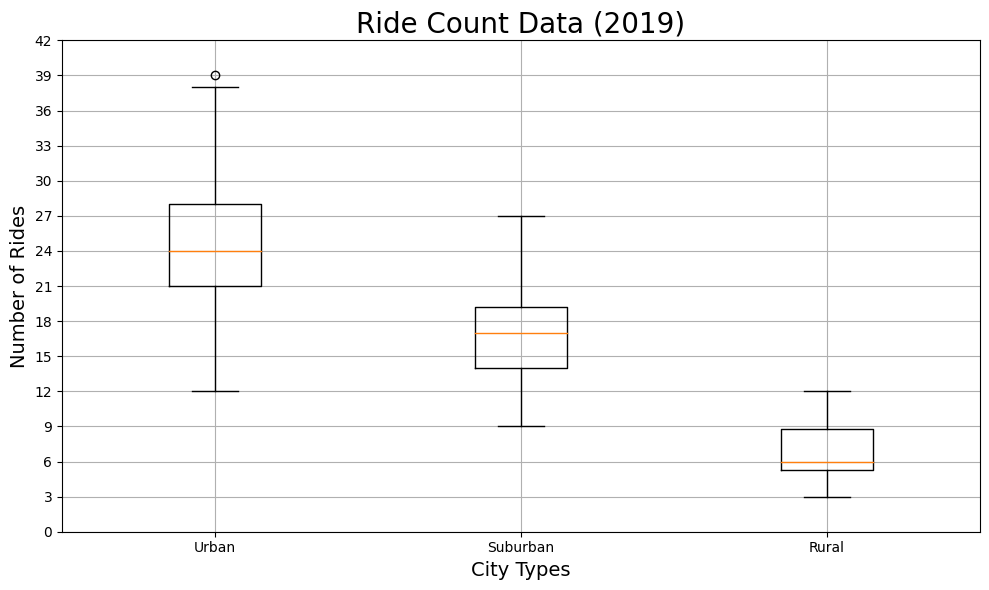

In [162]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
fig.savefig("analysis/Ride_Count_Data_2019.png")
fig.tight_layout()

In [163]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


# Box a Whisker for Ride Fare Data

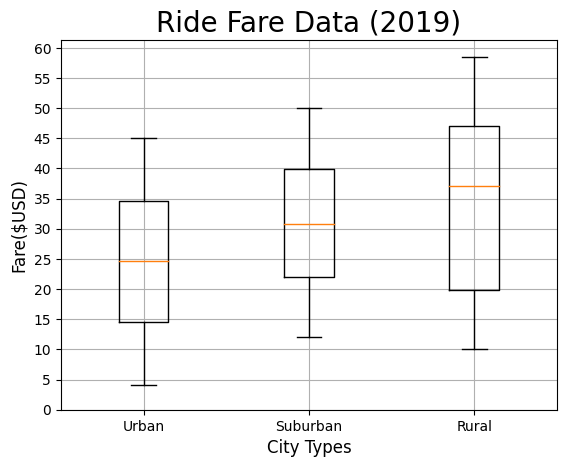

Summary Statistics


In [164]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban","Suburban","Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots()
ax.boxplot(fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)', fontsize=12)
ax.set_xlabel("City Types", fontsize=12)
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()
fig.savefig('analysis/Ride_Fare_Data_2019.png')

# Box and Whisker for Driver Count Data

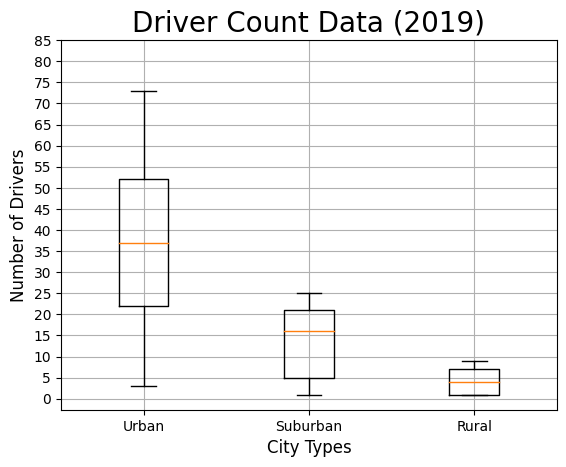

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [165]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban","Suburban","Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(driver_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=12)
ax.set_xlabel("City Types", fontsize=12)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
fig.savefig('analysis/Driver_Count_Data_2019.png')
fig.tight_layout()

print("Summary Statistics")
urban_drivers.describe()

# Pie Plot for Percentage of Ride Fares by City Type

In [166]:
#create variables to hold total fares by city
urban_fare_total = urban_fares.sum()
suburban_fare_total = suburban_fares.sum()
rural_fare_total = rural_fares.sum()

urban_fare_total

# OR with .groupby

sum_city_fares = merged_df.groupby(['type']).sum()['fare']

sum_city_fares




/var/folders/fg/_95_hyl97vs_68pl3g3nf6mw0000gn/T/ipykernel_22868/1545319464.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_city_fares = merged_df.groupby(['type']).sum()['fare']


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

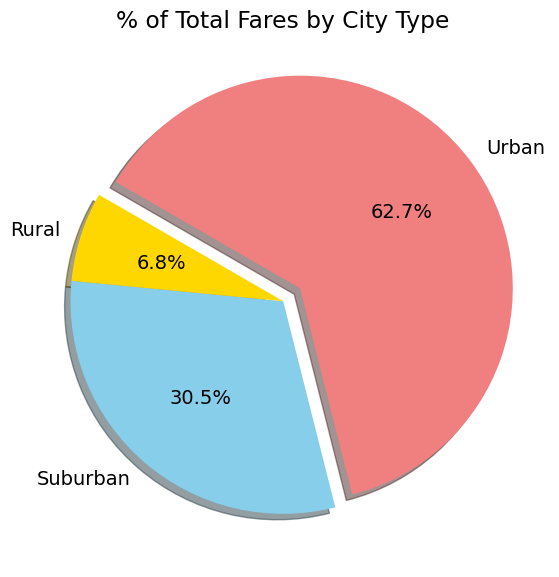

In [170]:
# create pie chart to display percentage of total fares by city
x_labels = ["Urban","Suburban","Rural"]
city_fares = [urban_fare_total, suburban_fare_total, rural_fare_total]
colors = ['lightcoral','skyblue','gold']
explode = [0.1,0,0]

fig, ax = plt.subplots(figsize=(10,6))
ax.pie(city_fares, 
       labels=x_labels,
       colors=colors,
       explode=explode,
       shadow=True,
       counterclock=False,
       startangle=150,
       autopct='%1.1f%%')


ax.set_title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14

# Add the legend.

fig.tight_layout()
fig.savefig('analysis/Ride_Fare_Percents_by_Type')


# Pie Plot for Percentage of Total Rides by City Type

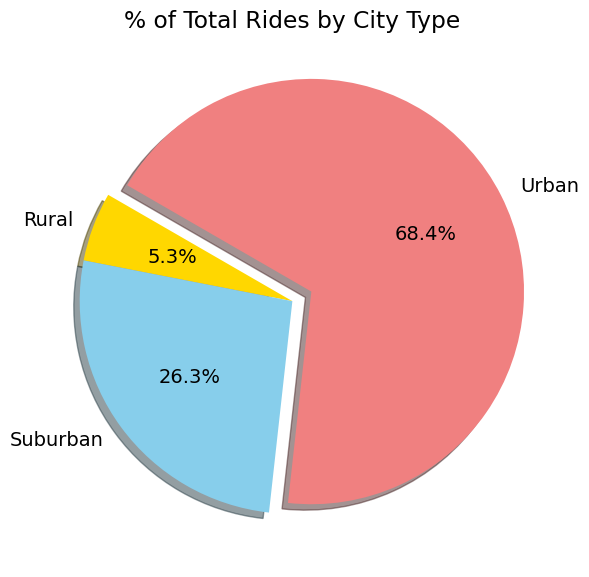

In [172]:
#Pie Chart = groupby type -> 'pd.DataFrame'.plot(...)

fig, ax = plt.subplots(figsize=(10,6))
merged_df.groupby(['type']).count()['ride_id'].plot(
       y=0,
       kind='pie',
       colors=['gold','skyblue','lightcoral'],
       explode=[0,0,0.1],
       shadow=True,
       startangle=150,
       autopct='%1.1f%%')


ax.set_title("% of Total Rides by City Type")
ax.set_ylabel("")
mpl.rcParams['font.size'] = 14
# mpl.rcParams['font.style'] = 'normal'
# mpl.rcParams['font.weight'] = 'bold'

# Add the legend.

fig.tight_layout()
fig.savefig('analysis/Ride_Count_Percents_by_Type.png')

# Pie Plot for Percentage of Total Drivers by City Type

/var/folders/fg/_95_hyl97vs_68pl3g3nf6mw0000gn/T/ipykernel_22868/1712433638.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_df.groupby(['type']).sum()['driver_count'].plot(


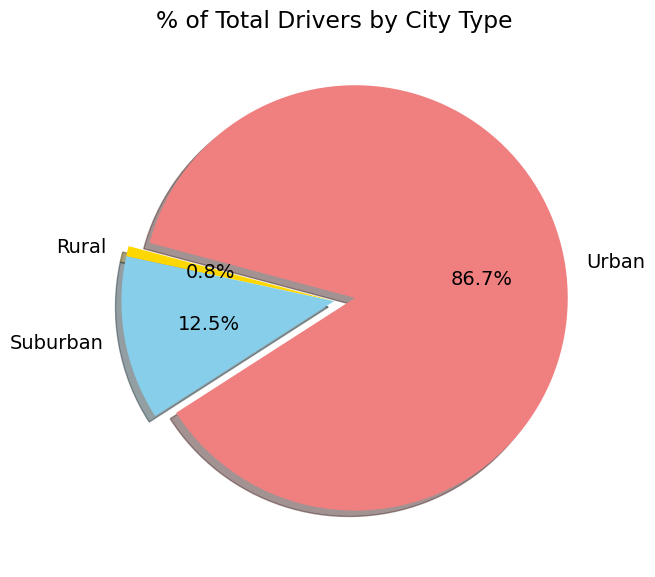

In [174]:
#Pie Chart = groupby type -> 'pd.DataFrame'.plot(...)

fig, ax = plt.subplots(figsize=(10,6))
merged_df.groupby(['type']).sum()['driver_count'].plot(
       y=0,
       kind='pie',
       colors=['gold','skyblue','lightcoral'],
       explode=[0,0,0.1],
       shadow=True,
       startangle=165,
       autopct='%1.1f%%')


ax.set_title("% of Total Drivers by City Type")
ax.set_ylabel("")
mpl.rcParams['font.size'] = 14
# mpl.rcParams['font.style'] = 'normal'
# mpl.rcParams['font.weight'] = 'bold'

# Add the legend.

fig.tight_layout()
fig.savefig('analysis/Driver_Count_Percents_by_Type.png')